### Description

#### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

#### Customer details:

1. CustomerID: Unique customer ID
2. ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
3. Age: Age of customer
4. TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
5. CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
6. Occupation: Occupation of customer
7. Gender: Gender of customer
8. NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
9. PreferredPropertyStar: Preferred hotel property rating by customer
10. MaritalStatus: Marital status of customer
11. NumberOfTrips: Average number of trips in a year by customer
12. Passport: The customer has a passport or not (0: No, 1: Yes)
13. OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
14. NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
15. Designation: Designation of the customer in the current organization
16. MonthlyIncome: Gross monthly income of the customer

#### Customer interaction data: 

1. PitchSatisfactionScore: Sales pitch satisfaction score
2. ProductPitched: Product pitched by the salesperson
3. NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
4. DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# converting zipcode to county
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

<IPython.core.display.Javascript object>

#### Loading dataframe from xlsx file

In [2]:
# loading the dataframe for user cars data
tourism = pd.read_excel("Tourism.xlsx", sheet_name="Tourism")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
df = tourism.copy()

<IPython.core.display.Javascript object>

#### Checking shape and random sample data from Dataframe

In [4]:
# checking shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# checking 10 random sample data
np.random.seed(1)
df.sample(n=10)

There are 4888 rows and 20 columns.


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


<IPython.core.display.Javascript object>

##All the data looks like in dataframe are in int or float. We can verify with dataframe info of the data types.

#### Checking data types of the columns in the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

<IPython.core.display.Javascript object>

* 'CCAvg' has **float** data type
* Other columns has **int** data type
* 'Experience', 'ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online' and 'CreditCard' should be a **category** column but has **int** data type

#### Removing the CustomerID column because it does not have impact on any column

In [6]:
df.drop(["CustomerID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Checking for duplicate values

In [7]:
df.duplicated().sum()  # checking for duplicate values

141

<IPython.core.display.Javascript object>

In [8]:
df.drop_duplicates(inplace=True)  # dropping duplicate values from dataset

<IPython.core.display.Javascript object>

In [9]:
df.duplicated().sum()  # checking for duplicate values again

0

<IPython.core.display.Javascript object>

No duplicate row found in the dataframe

In [10]:
# checking shape of the dataframe
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# checking 10 random sample data
np.random.seed(1)
df.sample(n=10)

There are 4747 rows and 19 columns.


,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
230,0,52.0,Self Enquiry,1,8.0,Salaried,Female,2,4.0,Basic,3.0,Single,1.0,0,3,0,0.0,Executive,18212.0
4622,0,37.0,Company Invited,3,15.0,Large Business,Male,3,4.0,Deluxe,3.0,Married,6.0,0,3,1,2.0,Manager,23757.0
3349,0,30.0,Self Enquiry,1,7.0,Salaried,Female,3,5.0,Super Deluxe,3.0,Married,5.0,0,2,0,NaN,AVP,34802.0
4129,0,42.0,Self Enquiry,3,13.0,Salaried,Female,4,4.0,Standard,3.0,Single,5.0,1,1,0,1.0,Senior Manager,32269.0
1567,0,28.0,Company Invited,3,10.0,Small Business,Male,2,3.0,Deluxe,3.0,Married,2.0,0,1,0,0.0,Manager,NaN
4444,0,28.0,Self Enquiry,1,7.0,Salaried,Female,4,4.0,Standard,5.0,Married,3.0,0,4,0,3.0,Senior Manager,26090.0
2028,0,32.0,Company Invited,1,30.0,Salaried,Male,3,3.0,Deluxe,3.0,Married,2.0,0,4,1,2.0,Manager,20309.0
299,0,51.0,Self Enquiry,1,8.0,Small Business,Male,2,5.0,Deluxe,4.0,Married,6.0,0,2,0,0.0,Manager,20482.0
4134,0,37.0,Self Enquiry,1,12.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,2.0,0,1,1,2.0,Manager,24592.0
1571,0,32.0,Self Enquiry,1,6.0,Salaried,Male,3,3.0,Basic,5.0,Single,2.0,0,1,0,1.0,Executive,17956.0


<IPython.core.display.Javascript object>

#### Checking for no. of missing values in the columns

In [11]:
df.isnull().sum()

ProdTaken                     0
Age                         216
TypeofContact                25
CityTier                      0
DurationOfPitch             246
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            44
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               138
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     60
Designation                   0
MonthlyIncome               224
dtype: int64

<IPython.core.display.Javascript object>

#### Update missing values for numeric cloumn with median value

In [12]:
df[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
] = df[
    [
        "Age",
        "DurationOfPitch",
        "NumberOfFollowups",
        "PreferredPropertyStar",
        "NumberOfTrips",
        "NumberOfChildrenVisiting",
        "MonthlyIncome",
    ]
].transform(
    lambda x: x.fillna(x.median())
)
df.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# Now checking value counts for each category columns
cat_col = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

Self Enquiry       3350
Company Invited    1372
NaN                  25
Name: TypeofContact, dtype: int64
--------------------------------------------------
Salaried          2293
Small Business    2028
Large Business     424
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Male       2835
Female     1769
Fe Male     143
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married      2279
Divorced      950
Single        875
Unmarried     643
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Executive         1800
Manager           1684
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64
------------------------------------------------

<IPython.core.display.Javascript object>

#### Updating 'TypeofContact' column missing values with 'Self Enquiry'

In [14]:
df["TypeofContact"].fillna("Self Enquiry", inplace=True)

<IPython.core.display.Javascript object>

#### Updating 'Gender' column 'Fe Male' value with 'Female'

In [15]:
df["Gender"] = df.Gender.str.replace("Fe Male", "Female")

<IPython.core.display.Javascript object>

#### Updating 'MaritalStatus' column 'Unmarried' value with 'Single', since both has same meaning

In [16]:
df["MaritalStatus"] = df.MaritalStatus.str.replace("Unmarried", "Single")

<IPython.core.display.Javascript object>

#### Updating 'Occupation' column 'Free Lancer' value with 'Small Business', since only 2 Free Lancer in dataset we can merge with  Small Business

In [17]:
df["Occupation"] = df.Occupation.str.replace("Free Lancer", "Small Business")

<IPython.core.display.Javascript object>

In [18]:
# Now checking value counts for each category columns
cat_col = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(dropna=False))
    print("-" * 50)

Self Enquiry       3375
Company Invited    1372
Name: TypeofContact, dtype: int64
--------------------------------------------------
Salaried          2293
Small Business    2030
Large Business     424
Name: Occupation, dtype: int64
--------------------------------------------------
Male      2835
Female    1912
Name: Gender, dtype: int64
--------------------------------------------------
Basic           1800
Deluxe          1684
Standard         714
Super Deluxe     324
King             225
Name: ProductPitched, dtype: int64
--------------------------------------------------
Married     2279
Single      1518
Divorced     950
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Executive         1800
Manager           1684
Senior Manager     714
AVP                324
VP                 225
Name: Designation, dtype: int64
--------------------------------------------------


<IPython.core.display.Javascript object>

In [19]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

<IPython.core.display.Javascript object>

In [20]:
cols = df.select_dtypes(["object"])
for i in cols.columns:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

#### Summary of the dataset.

In [21]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,NaN,NaN,NaN,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4747.0,NaN,NaN,NaN,37.513377,9.119956,18.0,31.0,36.0,43.0,61.0
TypeofContact,4747,2,Self Enquiry,3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4747.0,NaN,NaN,NaN,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4747.0,NaN,NaN,NaN,15.380872,8.330097,5.0,9.0,13.0,19.0,127.0
Occupation,4747,3,Salaried,2293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4747,2,Male,2835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4747.0,NaN,NaN,NaN,2.911734,0.72404,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4747.0,NaN,NaN,NaN,3.707815,1.004388,1.0,3.0,4.0,4.0,6.0
ProductPitched,4747,5,Basic,1800,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

## Data visualization

### Univariate Plot

In [22]:
# Univariate analysis of numerical variables to study their central tendency and dispersion.
# Write a function that will help us create a boxplot and a histogram for any input numerical variable.
# Function takes the numerical column as the input and returns the column describe, boxplots and histograms for the variable.


def univariate_num_plot(feature, figsize=(10, 8), bins=10):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print(feature.describe())
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        x=feature, ax=ax_box2, showmeans=True
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        x=feature, kde=True, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        x=feature, kde=True, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="red", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [23]:
# Function to create barplots that indicate percentage for each category.


def univariate_cat_plot(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(x=data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

count    4747.000000
mean       37.513377
std         9.119956
min        18.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        61.000000
Name: Age, dtype: float64


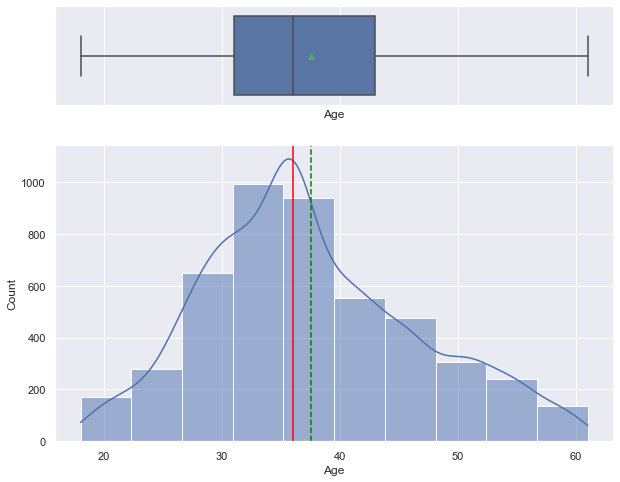

<IPython.core.display.Javascript object>

In [24]:
univariate_num_plot(df["Age"])

count    4747.000000
mean       15.380872
std         8.330097
min         5.000000
25%         9.000000
50%        13.000000
75%        19.000000
max       127.000000
Name: DurationOfPitch, dtype: float64


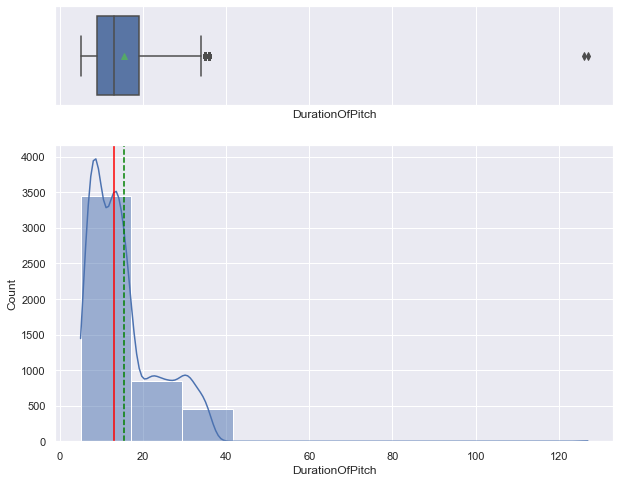

<IPython.core.display.Javascript object>

In [25]:
univariate_num_plot(df["DurationOfPitch"])

count    4747.000000
mean        3.226459
std         1.821210
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        22.000000
Name: NumberOfTrips, dtype: float64


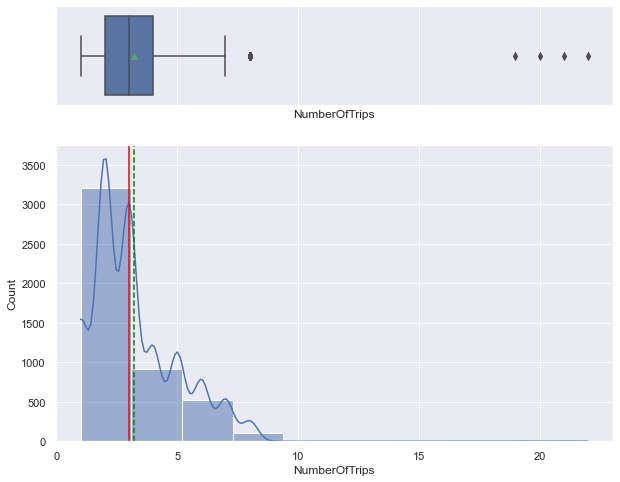

<IPython.core.display.Javascript object>

In [26]:
univariate_num_plot(df["NumberOfTrips"])

count     4747.000000
mean     23541.308827
std       5264.002340
min       1000.000000
25%      20474.500000
50%      22311.000000
75%      25389.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64


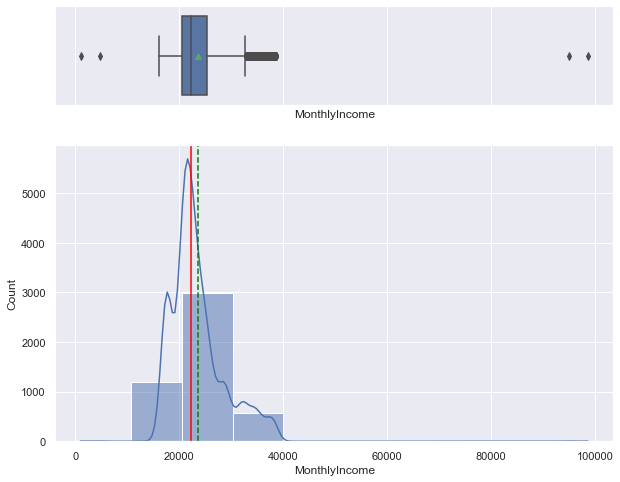

<IPython.core.display.Javascript object>

In [27]:
univariate_num_plot(df["MonthlyIncome"])

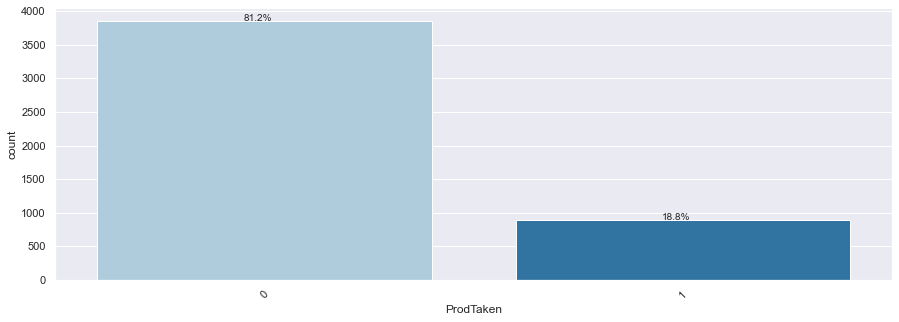

<IPython.core.display.Javascript object>

In [28]:
univariate_cat_plot(df, "ProdTaken")

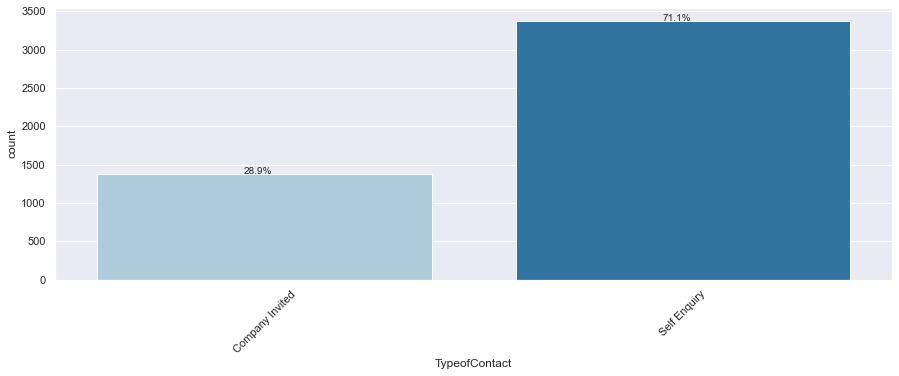

<IPython.core.display.Javascript object>

In [29]:
univariate_cat_plot(df, "TypeofContact")

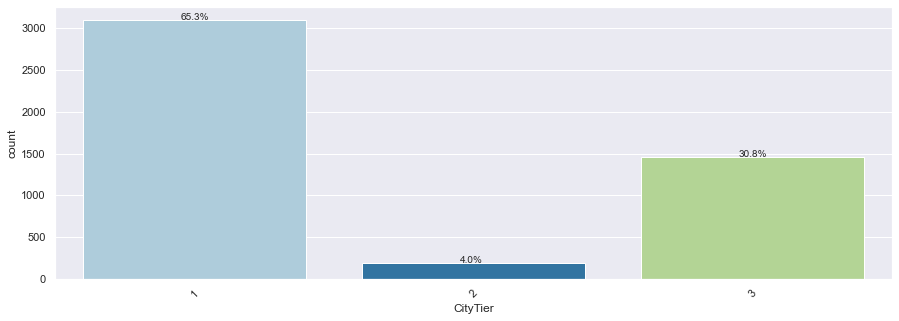

<IPython.core.display.Javascript object>

In [30]:
univariate_cat_plot(df, "CityTier")

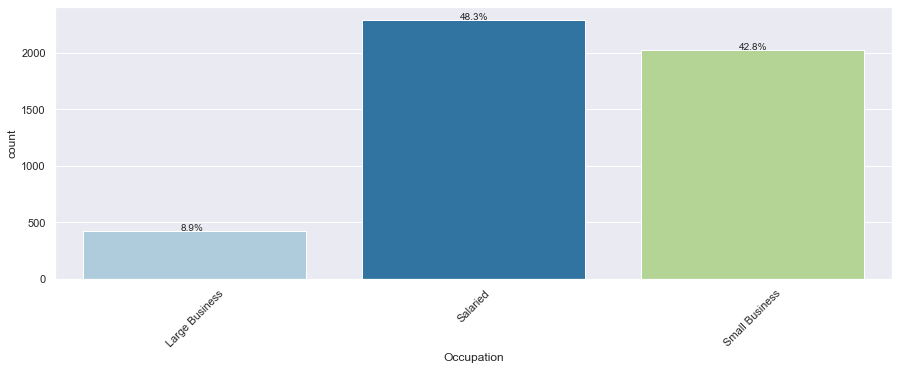

<IPython.core.display.Javascript object>

In [31]:
univariate_cat_plot(df, "Occupation")

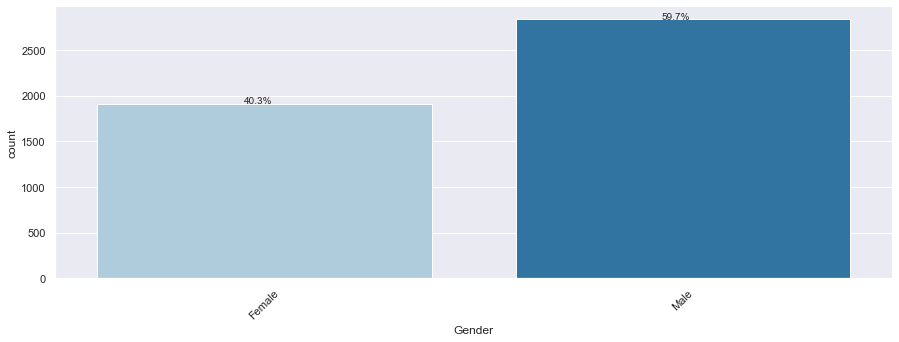

<IPython.core.display.Javascript object>

In [32]:
univariate_cat_plot(df, "Gender")

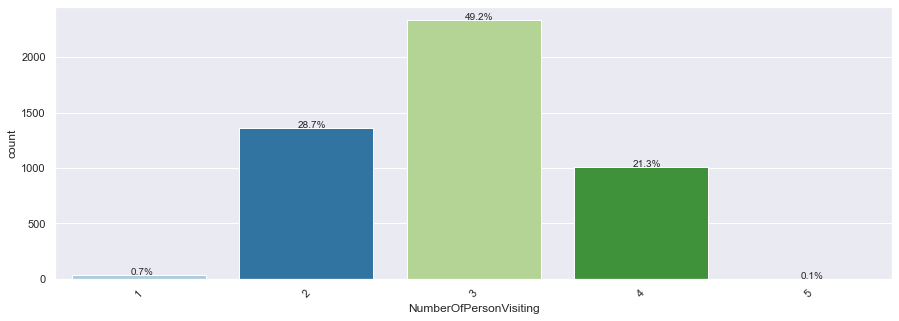

<IPython.core.display.Javascript object>

In [33]:
univariate_cat_plot(df, "NumberOfPersonVisiting")

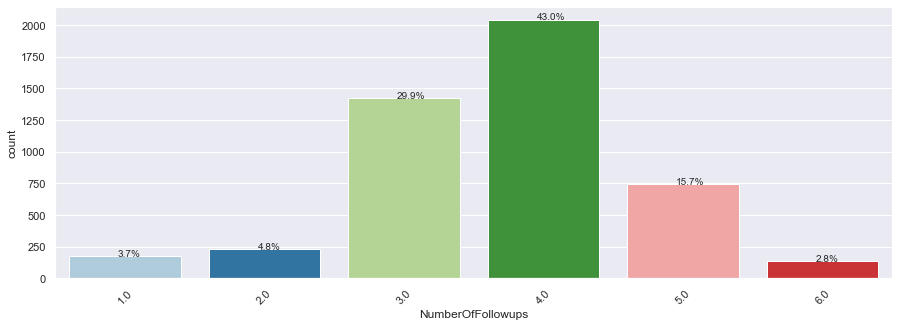

<IPython.core.display.Javascript object>

In [34]:
univariate_cat_plot(df, "NumberOfFollowups")

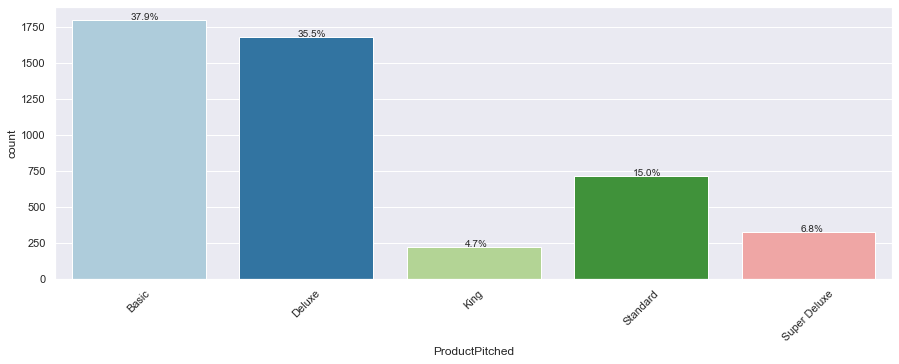

<IPython.core.display.Javascript object>

In [35]:
univariate_cat_plot(df, "ProductPitched")

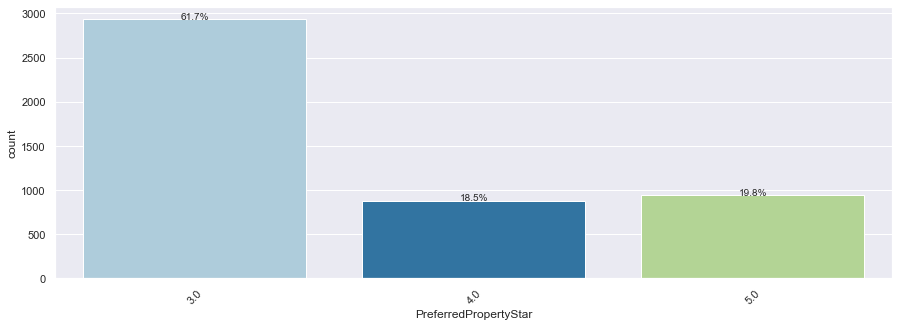

<IPython.core.display.Javascript object>

In [36]:
univariate_cat_plot(df, "PreferredPropertyStar")

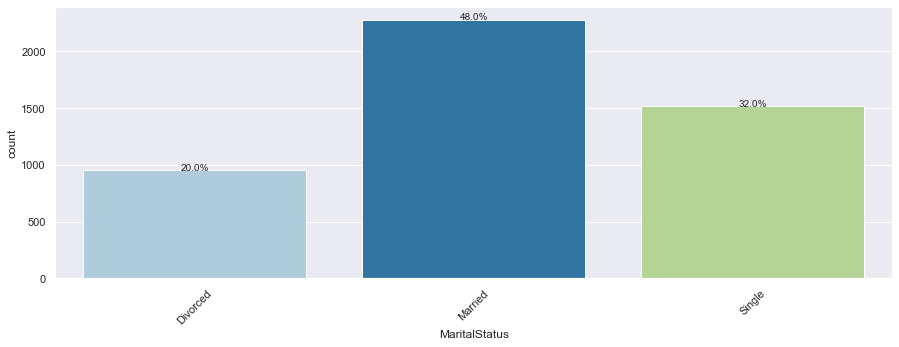

<IPython.core.display.Javascript object>

In [37]:
univariate_cat_plot(df, "MaritalStatus")

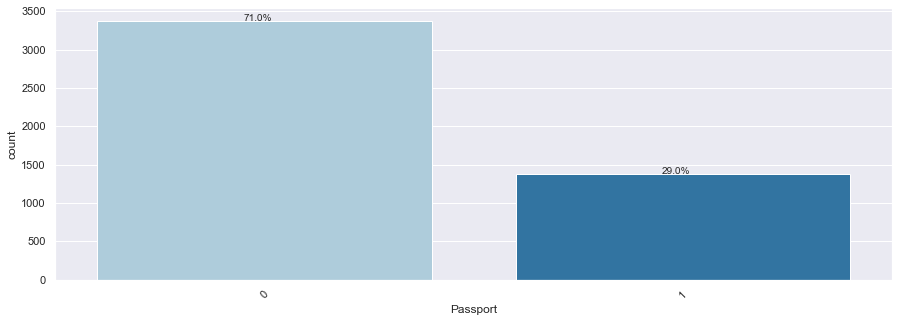

<IPython.core.display.Javascript object>

In [38]:
univariate_cat_plot(df, "Passport")

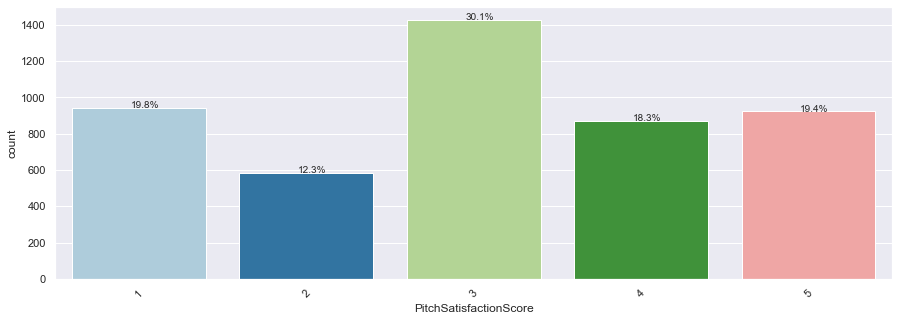

<IPython.core.display.Javascript object>

In [39]:
univariate_cat_plot(df, "PitchSatisfactionScore")

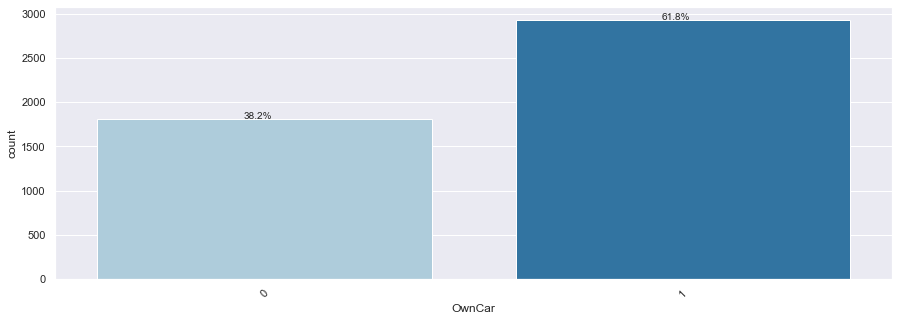

<IPython.core.display.Javascript object>

In [40]:
univariate_cat_plot(df, "OwnCar")

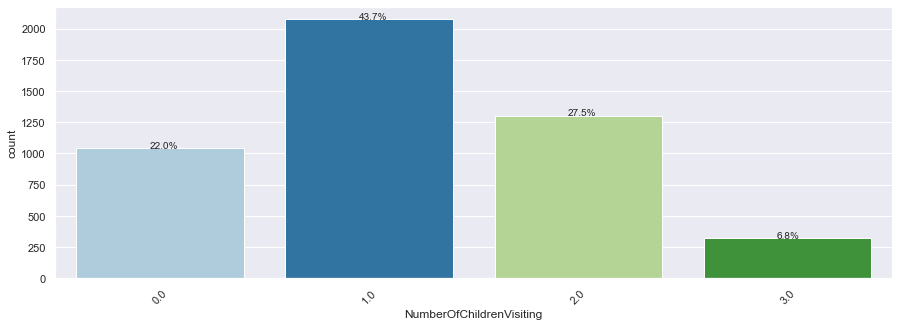

<IPython.core.display.Javascript object>

In [41]:
univariate_cat_plot(df, "NumberOfChildrenVisiting")

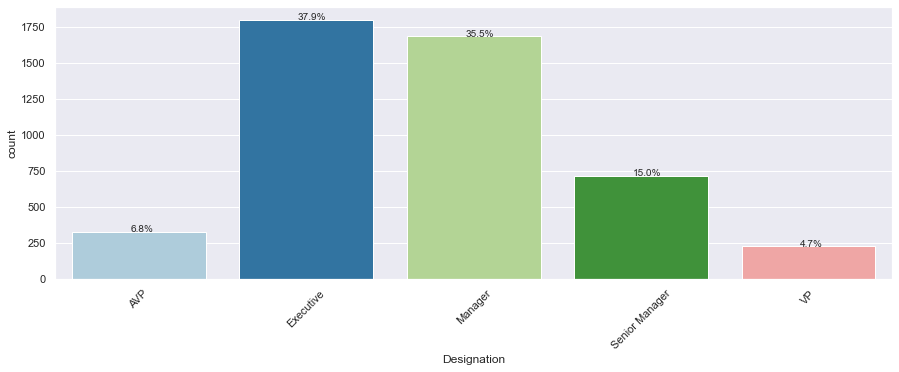

<IPython.core.display.Javascript object>

In [42]:
univariate_cat_plot(df, "Designation")

### Bivariate Analysis

In [43]:
## using pairplot to understand the correlation of all the numerical columns.
# sns.set_theme(style="ticks")
# sns.pairplot(data=df, hue="ProdTaken")

<IPython.core.display.Javascript object>

### Heat map

<AxesSubplot:>

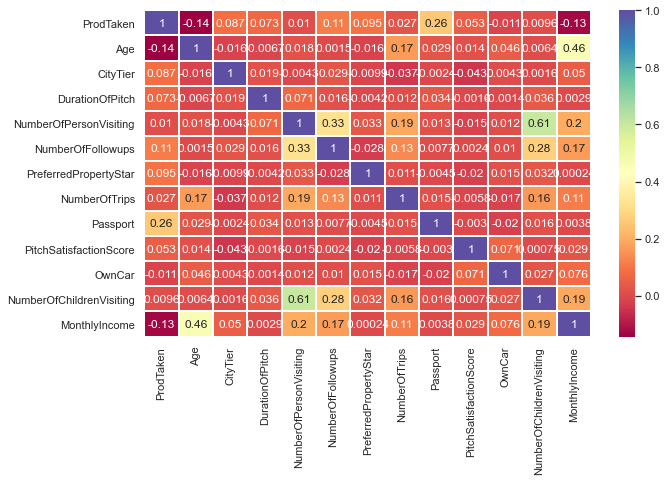

<IPython.core.display.Javascript object>

In [44]:
plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, linewidths=1, cmap="Spectral")

In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [46]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

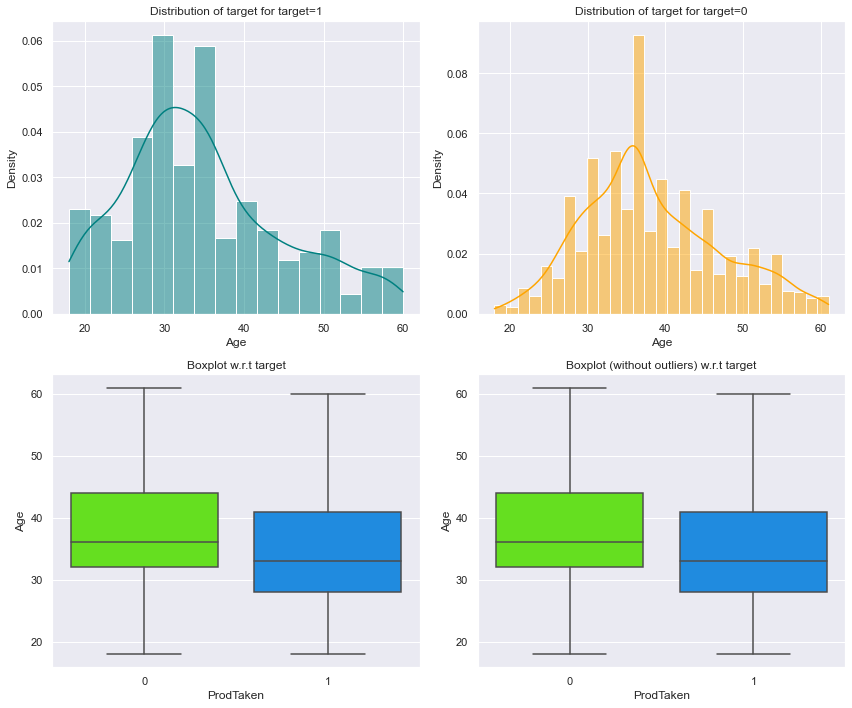

<IPython.core.display.Javascript object>

In [47]:
distribution_plot_wrt_target(df, "Age", "ProdTaken")

ProdTaken           0    1   All
TypeofContact                   
All              3853  894  4747
Self Enquiry     2775  600  3375
Company Invited  1078  294  1372
------------------------------------------------------------------------------------------------------------------------


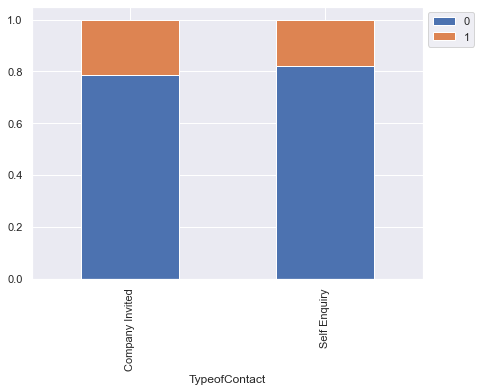

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "TypeofContact", "ProdTaken")

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are no duplicate values in the dataset.
- There are no missing values in the data.
- Most of the data-types are either **int64** or **float64**.


**Observations from EDA:**

0   Age                 5000 non-null   int64   ======> this HELPS IN DETERMING THE  age limits so we can assess our programs

1   Experience          5000 non-null   int64   ======>   this looks very similar to age and we can eventually leave it

2   Income              5000 non-null   int64   =======> income helps in determining the spending of family, our key factor

3   ZIP Code             5000 non-null   int64   =======>  This gives the family living surrounding so we can explore more

4   Family              5000 non-null   int64  ========>  size of family helps understand the outliers as well and spending

5   Crag               5000 non-null   float64 ========> this has to be average rating to help determine analysis for credit

6   Education           5000 non-null   int64    =======> typically education gives more choose to find better income

7   Mortgage            5000 non-null   int64    =======>  this helps to ensure if further loans are needed or not

8   Personal Loan       5000 non-null   int64   =========>   this helps in assessing if we can give one more loan

9   Securities Account  5000 non-null   int64   ==========>  this helps in assessment of loan

10  CD Account          5000 non-null   int64   ==========>   helps determine current liquidity with customer

11  Online              5000 non-null   int64   ==========>  helps target customer on multiple platforms

12  Credit Card          5000 non-null   int64  ===========>  helps get assesment if customer is credit worrthy

### Data Pre-Processing

In [49]:
df_pre = df.copy()  # copy data for preprocessing

<IPython.core.display.Javascript object>

### Define dependent and independent variables

In [50]:
ind_vars = df_pre.drop(["ProdTaken"], axis=1)
dep_var = df_pre["ProdTaken"]

# encode dep_var class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(dep_var)
label_encoded_y = label_encoder.transform(dep_var)

<IPython.core.display.Javascript object>

#### Adding dummy variables for category columns and Creating training and test data sets

In [51]:
oneHotCols = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]
ind_vars = pd.get_dummies(data=ind_vars, columns=oneHotCols, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.30, random_state=1, stratify=dep_var
)
print(X_train.shape, X_test.shape)

(3322, 26) (1425, 26)


<IPython.core.display.Javascript object>

In [52]:
ind_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          4747 non-null   float64
 1   CityTier                     4747 non-null   int64  
 2   DurationOfPitch              4747 non-null   float64
 3   NumberOfPersonVisiting       4747 non-null   int64  
 4   NumberOfFollowups            4747 non-null   float64
 5   PreferredPropertyStar        4747 non-null   float64
 6   NumberOfTrips                4747 non-null   float64
 7   Passport                     4747 non-null   int64  
 8   PitchSatisfactionScore       4747 non-null   int64  
 9   OwnCar                       4747 non-null   int64  
 10  NumberOfChildrenVisiting     4747 non-null   float64
 11  MonthlyIncome                4747 non-null   float64
 12  TypeofContact_Self Enquiry   4747 non-null   uint8  
 13  Occupation_Salarie

<IPython.core.display.Javascript object>

In [53]:
ind_vars.sample(n=10)

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,TypeofContact_Self Enquiry,Occupation_Salaried,Occupation_Small Business,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
1934,37.0,1,6.0,2,3.0,3.0,5.0,0,5,1,0.0,22491.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
2798,31.0,3,32.0,3,4.0,3.0,2.0,1,3,1,1.0,23414.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
261,38.0,3,8.0,2,4.0,3.0,4.0,0,5,1,1.0,20249.0,0,1,0,1,1,0,0,0,0,0,0,1,0,0
2709,30.0,3,9.0,4,5.0,4.0,4.0,0,4,0,2.0,25322.0,1,0,1,1,1,0,0,0,0,0,0,1,0,0
3754,59.0,1,22.0,3,4.0,3.0,4.0,1,1,1,1.0,34465.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0
2800,43.0,1,9.0,4,5.0,3.0,5.0,0,2,0,2.0,25459.0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
220,36.0,1,11.0,3,3.0,4.0,1.0,0,2,0,2.0,20914.0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
3016,30.0,1,34.0,4,4.0,3.0,6.0,0,2,1,1.0,23013.0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4480,48.0,3,34.0,4,2.0,3.0,6.0,1,4,0,2.0,25075.0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2760,50.0,1,7.0,3,5.0,3.0,2.0,1,3,1,1.0,32642.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [54]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3322, 26)
Shape of test set :  (1425, 26)
Percentage of classes in training set:
0    0.811559
1    0.188441
Name: ProdTaken, dtype: float64
Percentage of classes in test set:
0    0.81193
1    0.18807
Name: ProdTaken, dtype: float64


<IPython.core.display.Javascript object>

## Building the model

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [56]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Building the model for Bagging, Random Forest and Decision Tree
- We are going to build 3 ensemble models here - Bagging Classifier, Random Forest Classifier and Decision Tree Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.994281  0.971246   0.998358  0.984615
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.90386  0.593284   0.850267  0.698901


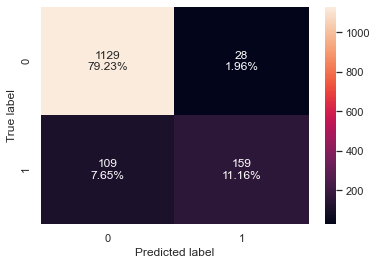

<IPython.core.display.Javascript object>

In [57]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.917895  0.604478   0.936416  0.734694


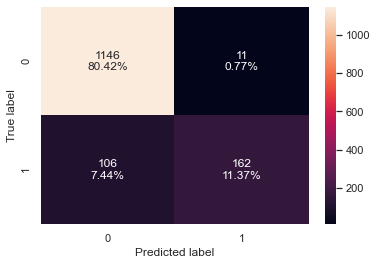

<IPython.core.display.Javascript object>

In [58]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

### Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.90807  0.735075   0.766537  0.750476


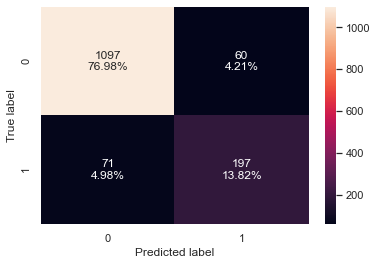

<IPython.core.display.Javascript object>

In [59]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics
dtree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", dtree_model_train_perf)
dtree_model_test_perf = model_performance_classification_sklearn(d_tree, X_test, y_test)
print("Testing performance:\n", dtree_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

### Hyperparameter Tuning

### Bagging Classifier

**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.928421  0.679104   0.919192  0.781116


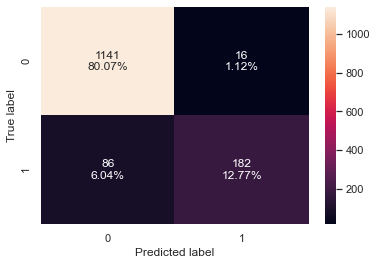

<IPython.core.display.Javascript object>

In [60]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

# Calculating different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", dtree_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

### Random Forest Classifier
**Now, let's see if we can get a better model by tuning the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.


Training performance:
    Accuracy    Recall  Precision        F1
0  0.915412  0.592652   0.934509  0.725318
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.870175  0.421642    0.79021  0.549878


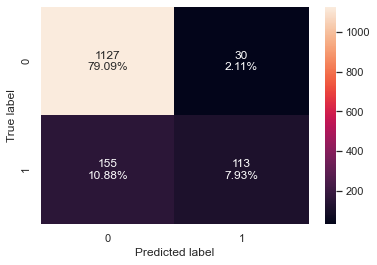

<IPython.core.display.Javascript object>

In [61]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_estimator_tuned, X_train, y_train
)
print("Training performance:\n", rf_estimator_tuned_model_train_perf)
rf_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", rf_estimator_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

#### Insights
- We can see that random forest's performance has increased as compared to the random forest model with default parameters.
- Model is slightly overfitting the data but not as much as the tuned bagging classifier.
- The test recall is still very low. This means that the model is not good at identifying defaulters which is our primary aim here.

#### Let's try using class_weights for random forest:
- The model performance is not very good. This may be due to the fact that the classes are imbalanced with 70% non-defaulters and 30% defaulters. 

- We should make the model aware that the class of interest here is 'defaulters'.

- We can do so by passing the parameter `class_weights` available for random forest. This parameter is not available for the bagging classifier.

- class_weight specifies the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

- We can choose class_weights={0:0.19,1:0.81} because that is the original imbalance in our data.

Training performance:
    Accuracy    Recall  Precision       F1
0  0.894642  0.825879   0.682058  0.74711
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.844912  0.664179   0.576052  0.616984


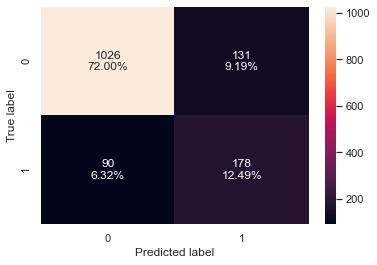

<IPython.core.display.Javascript object>

In [62]:
# Choose the type of classifier.
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.19, 1: 0.81}],
    "n_estimators": [100, 150, 200, 250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

# Calculating different metrics
rf_estimator_weighted_model_train_perf = model_performance_classification_sklearn(
    rf_estimator_weighted, X_train, y_train
)
print("Training performance:\n", rf_estimator_weighted_model_train_perf)
rf_estimator_weighted_model_test_perf = model_performance_classification_sklearn(
    rf_estimator_weighted, X_test, y_test
)
print("Testing performance:\n", rf_estimator_weighted_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_weighted, X_test, y_test)

### Insights
- The model accuracy has decreased a bit but the overfitting has also been reduced and the model is generalizing well.
- The train and test recall both have increased significantly.
- We can see from the confusion matrix that the random forest model with class weights is now better at identifying the defaulters as compared to other models.

### Decision Tree Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.813666  0.658147   0.504284  0.571033
Testing performance:
    Accuracy    Recall  Precision        F1
0       0.8  0.597015   0.474777  0.528926


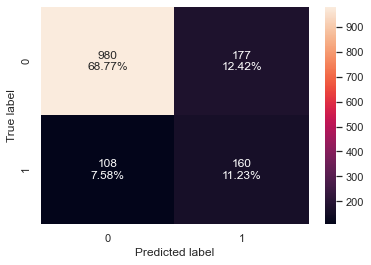

<IPython.core.display.Javascript object>

In [63]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.19, 1: 0.81}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 10),
    "min_samples_leaf": [5, 7, 10, 15],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)
# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

### Insights
- The model accuracy has decreased a bit but the overfitting has also been reduced and the model is generalizing well.
- The train and test recall both have increased significantly.
- We can see from the confusion matrix that the random forest model with class weights is now better at identifying the defaulters as compared to other models.

### Checking the feature importance

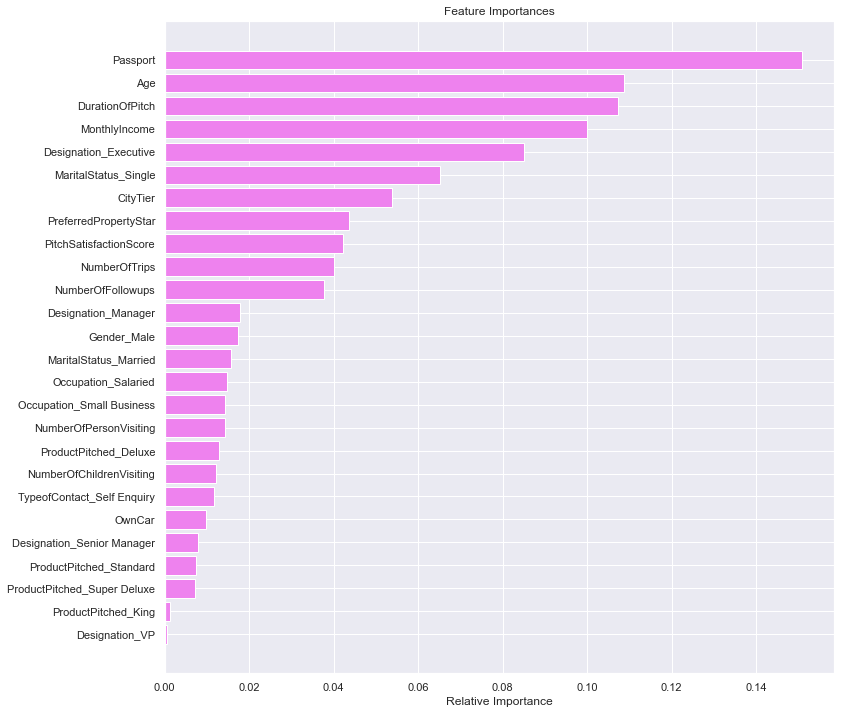

<IPython.core.display.Javascript object>

In [64]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(ind_vars.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all models till now

In [65]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_tuned_model_train_perf.T,
        rf_estimator_weighted_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator Tuned",
    "Random Forest Estimator Tuned",
    "Weighted Random Forest Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator Tuned,Random Forest Estimator Tuned,Weighted Random Forest Classifier
Accuracy,1.0,0.994281,1.0,0.813666,0.999097,0.915412,0.894642
Recall,1.0,0.971246,1.0,0.658147,0.995208,0.592652,0.825879
Precision,1.0,0.998358,1.0,0.504284,1.000000,0.934509,0.682058
F1,1.0,0.984615,1.0,0.571033,0.997598,0.725318,0.747110


<IPython.core.display.Javascript object>

In [66]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_tuned_model_test_perf.T,
        rf_estimator_weighted_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator Tuned",
    "Random Forest Estimator Tuned",
    "Weighted Random Forest Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Random Forest Classifier,Decision Tree Estimator,Bagging Estimator Tuned,Random Forest Estimator Tuned,Weighted Random Forest Classifier
Accuracy,0.908070,0.903860,0.917895,0.800000,0.928421,0.870175,0.844912
Recall,0.735075,0.593284,0.604478,0.597015,0.679104,0.421642,0.664179
Precision,0.766537,0.850267,0.936416,0.474777,0.919192,0.790210,0.576052
F1,0.750476,0.698901,0.734694,0.528926,0.781116,0.549878,0.616984


<IPython.core.display.Javascript object>

### Building the model AdaBoost Classifier, Gradient Boosting Classifier, XGBoost Classifier and Stacking Classifier
- We are going to build 4 ensemble models here - AdaBoost Classifier, Gradient Boosting Classifier, XGBoost Classifier and Stacking Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision and Recall but the metric of interest here is recall.
- `Recall` - It gives the ratio of True positives to Actual positives, so high Recall implies low false negatives, i.e. low chances of predicting a defaulter as non defaulter

### AdaBoost Classifier

Training performance 
    Accuracy    Recall  Precision        F1
0  0.850993  0.346645   0.716172  0.467169
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.840702  0.302239   0.669421  0.416452


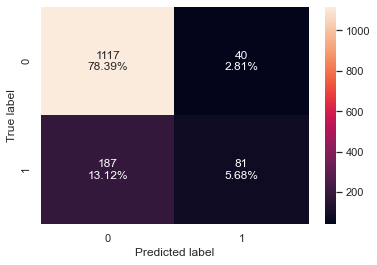

<IPython.core.display.Javascript object>

In [67]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance \n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance \n", ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

### Gradient Boosting Classifier

Training performance 
    Accuracy    Recall  Precision        F1
0  0.893137  0.507987   0.871233  0.641776
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.861754  0.410448   0.738255  0.527578


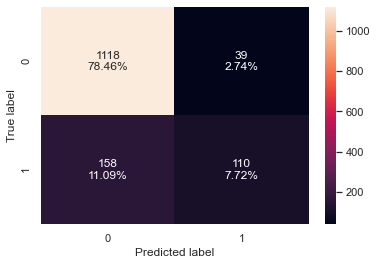

<IPython.core.display.Javascript object>

In [68]:
# Fitting the model
gbc_classifier = GradientBoostingClassifier(random_state=1)
gbc_classifier.fit(X_train, y_train)

# Calculating different metrics
gbc_classifier_model_train_perf = model_performance_classification_sklearn(
    gbc_classifier, X_train, y_train
)
print("Training performance \n", gbc_classifier_model_train_perf)
gbc_classifier_model_test_perf = model_performance_classification_sklearn(
    gbc_classifier, X_test, y_test
)
print("Testing performance \n", gbc_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_classifier, X_test, y_test)

### XGBoost Classifier

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.927018  0.716418   0.872727  0.786885


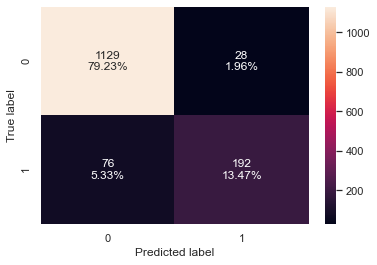

<IPython.core.display.Javascript object>

In [69]:
# Fitting the model
xgb_classifier = XGBClassifier(
    random_state=1, eval_metric="logloss", use_label_encoder=False
)
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance \n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance \n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

### Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.982541  0.939297   0.967105  0.952998
Testing performance 
    Accuracy   Recall  Precision        F1
0  0.873684  0.63806   0.673228  0.655172


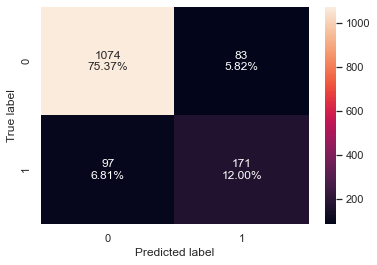

<IPython.core.display.Javascript object>

In [70]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance \n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance \n", abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

#### Insights
- The model is overfitting the train data as train accuracy is much higher than the test accuracy.
- The model has low test recall. This implies that the model is not good at identifying defaulters.

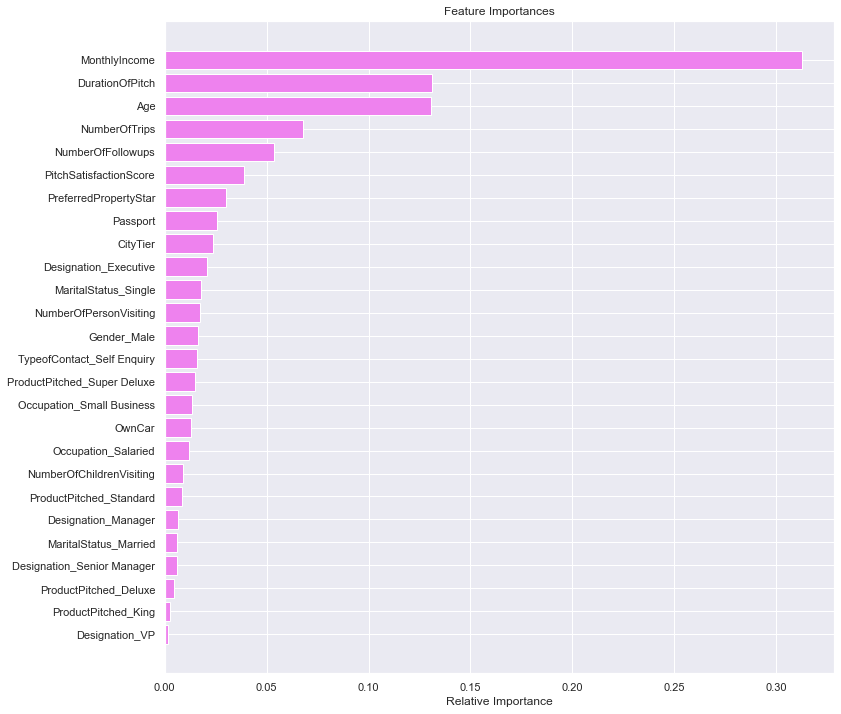

<IPython.core.display.Javascript object>

In [71]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(ind_vars.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

Training performance 
    Accuracy    Recall  Precision        F1
0  0.891331  0.496805   0.871148  0.632757
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.865965  0.432836   0.748387  0.548463


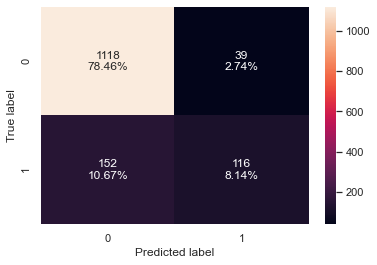

<IPython.core.display.Javascript object>

In [72]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

# Calculating different metrics
gbc_init_model_train_perf = model_performance_classification_sklearn(
    gbc_init, X_train, y_train
)
print("Training performance \n", gbc_init_model_train_perf)
gbc_init_model_test_perf = model_performance_classification_sklearn(
    gbc_init, X_test, y_test
)
print("Testing performance \n", gbc_init_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_init, X_test, y_test)

**As compared to the model with default parameters:**

- Test accuracy and test recall have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.921734  0.638978   0.921659  0.754717
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.870877  0.473881   0.747059  0.579909


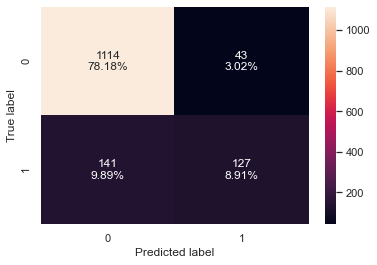

<IPython.core.display.Javascript object>

In [73]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance \n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance \n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

#### Insights
- The model performace has not increased by much.
- The model has started to overfit the train data in terms of recall.
- It is better at identifying non-defaulters than identifying defaulters which is the opposite of the result we need.

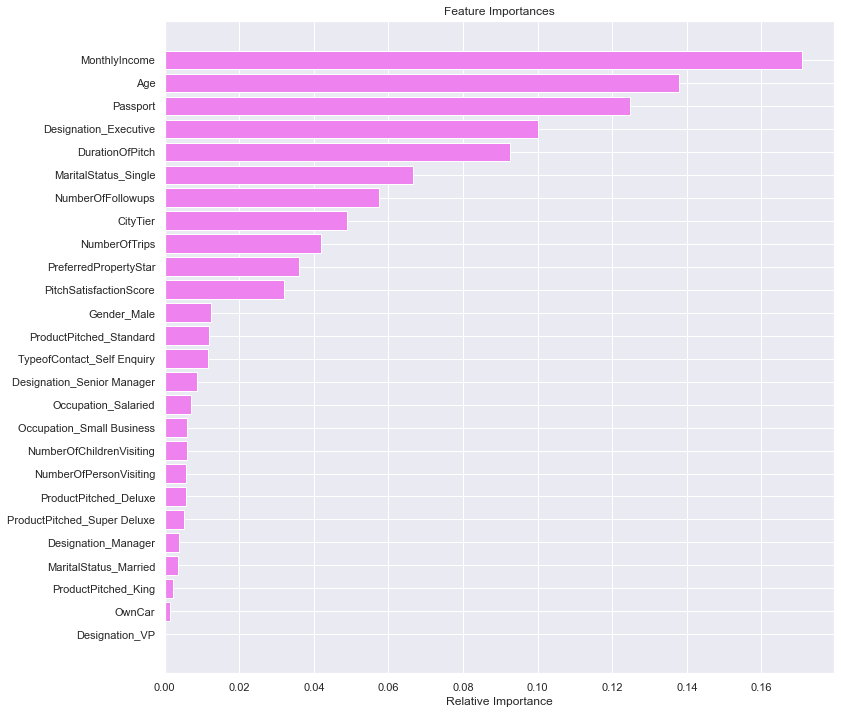

<IPython.core.display.Javascript object>

In [74]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(ind_vars.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### XGBoost Classifier

**XGBoost has many hyper parameters which can be tuned to increase the model performance. You can read about them in the xgboost documentation [here](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters). Some of the important parameters are:**
- scale_pos_weight:Control the balance of positive and negative weights, useful for unbalanced classes. It has range from 0 to $\infty$.
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree: Corresponds to the fraction of features (the columns) to use.
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree.
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level.
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree.
- learning_rate/eta: Makes the model more robust by shrinking the weights on each step.
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

Training performance 
    Accuracy    Recall  Precision        F1
0  0.916918  0.934505   0.713415  0.809129
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.863158  0.798507   0.602817  0.686998


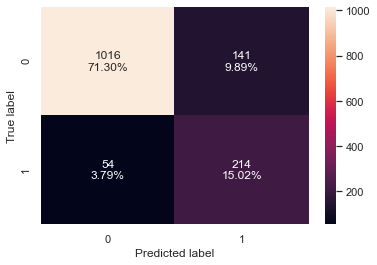

<IPython.core.display.Javascript object>

In [75]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(
    random_state=1, eval_metric="logloss", use_label_encoder=False
)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10, 100, 20),
    "scale_pos_weight": [0, 1, 2, 5],
    "subsample": [0.5, 0.7, 0.9, 1],
    "learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gamma": [0, 1, 3],
    "colsample_bytree": [0.5, 0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance \n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance \n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

#### Insights
- The test accuracy of the model has reduced as compared to the model with default parameters but the recall has increased significantly and the model is able to identify most of the defaulters.
- Decreasing number of false negatives has increased the number of false positives here.
- The tuned model is not overfitting and generalizes well.

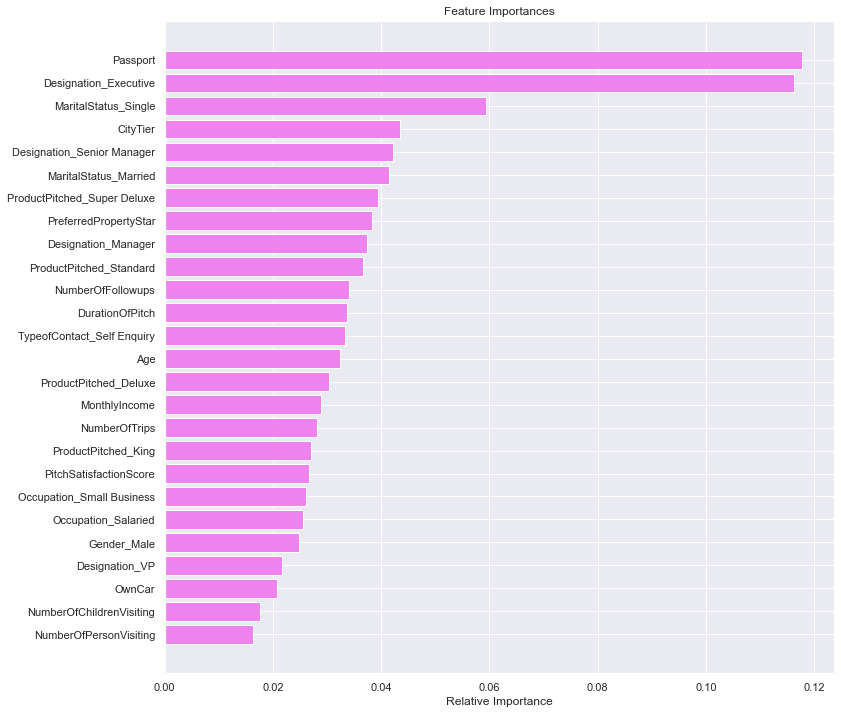

<IPython.core.display.Javascript object>

In [76]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(ind_vars.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [84]:
estimators = [
    ("Decision Tree", dtree_estimator),
    ("Random Forest", rf_estimator_weighted),
    ("Bagging", bagging_estimator_tuned),
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
]
final_estimator = XGBClassifier(
    random_state=1, eval_metric="logloss", use_label_encoder=False
)

<IPython.core.display.Javascript object>

Training performance 
    Accuracy    Recall  Precision       F1
0  0.998495  0.996805   0.995215  0.99601
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.924912  0.791045   0.806084  0.798493


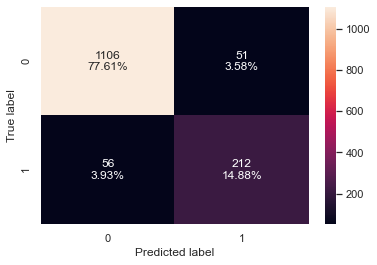

<IPython.core.display.Javascript object>

In [85]:
stacking_estimator = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator, cv=5
)
stacking_estimator.fit(X_train, y_train)

# Calculating different metrics
stacking_estimator_model_train_perf = model_performance_classification_sklearn(
    stacking_estimator, X_train, y_train
)
print("Training performance \n", stacking_estimator_model_train_perf)
stacking_estimator_model_test_perf = model_performance_classification_sklearn(
    stacking_estimator, X_test, y_test
)
print("Testing performance \n", stacking_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

## Comparing all models